# Climate observation data visualisation using Pandas or Dask Dataframe

* Read in station information
* Visualise station distribution
* Read in the time series data at one station
* Visualise time series data

---

- Authors: NCI Virtual Research Environment Team
- Keywords: Climate observation, Pandas, data visualisation
- Create Date: 2020-Jul
    
---

This notebook is licenced under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/)

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import os
import dask
import dask.dataframe as dd
from dask.distributed import Client
from matplotlib import pyplot as plt
%matplotlib inline

### Australian Climate Observation Reference Network (ACORN) 

Location on Gadi: /g/data/yj45

The Australian Climate Observations Reference Network (ACORN) has been developed to monitor climate variability and change in Australia.

The  ACORN – Surface Air Temperature (ACORN-SAT) network is specific to temperature. 

The dataset employs the peer-reviewed and published data analysis techniques and takes advantage of more than 100 years of digitised observational data to provide a daily record of Australian temperatures since 1910.

The data is comparable through time, making adjustments for historic changes in observing practices and observing locations, which enable climates researchers to better understand long-term changes in monthly and seasonal climate, as well as changes in day-to-day weather, such as the frequency of heat and cold extremes.

POC: Rob Smalley (robert.smalley@bom.gov.au)

In [2]:
text_file = "/g/data/yj45/acorn/sat/version_2/site_data/acorn_sat_v2_stations.txt"

# read in lat, lon and elevation
from numpy import loadtxt
stnnum = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(0), unpack=True)
lat = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(1), unpack=True)
lon = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(2), unpack=True)
elev = loadtxt(text_file, skiprows=1, delimiter=" ", usecols=(3), unpack=True)

Create a panda dataframe using station location information:

In [3]:
st = pd.DataFrame({
    'lat':lat,
    'lon':lon,
    'elevation':elev
})
st

,lat,lon,elevation
0,-14.30,126.65,23.0
1,-18.23,127.66,422.0
2,-17.95,122.24,7.4
3,-20.37,118.63,6.4
4,-21.18,119.75,182.3
...,...,...,...
107,-40.99,148.35,19.7
108,-43.49,147.15,55.0
109,-42.89,147.33,50.5
110,-42.99,147.07,65.0


Plot lat/lon as scatter plot

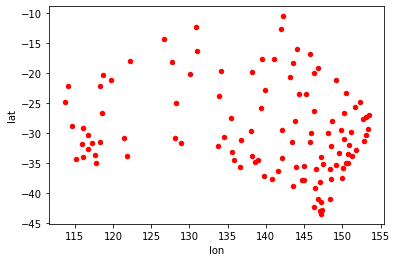

In [4]:
import matplotlib.pyplot as plt
st.plot(kind='scatter',x='lon',y='lat',color='red')
plt.show()

Plot elevation as bar plot

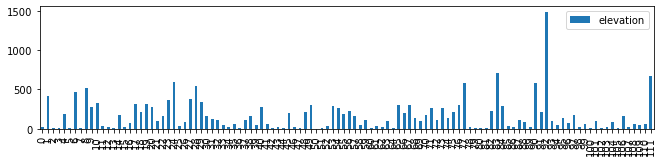

In [5]:
st.plot(kind='bar',y='elevation',figsize=(11, 2.25))

Read in one station data and plot the time series using `pandas.plot()`

In [6]:
dat = pd.read_csv('/g/data/yj45/acorn/sat/version_2/site_data/tmax.001019.daily.csv',
                 names=['dates','max temp (C)','site number','site name'],
                 skiprows=2)

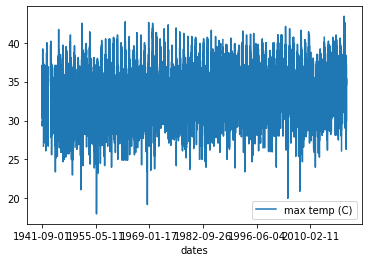

In [7]:
dat.plot(kind='line',x='dates',y='max temp (C)')

Read temperature data for two stations:

In [8]:
st1 = pd.read_csv('/g/data/yj45/acorn/sat/version_2/site_data/tmax.001019.daily.csv',
                 names=['dates','max temp (C)','site number','site name'],
                 skiprows=2)
st2 = pd.read_csv('/g/data/yj45/acorn/sat/version_2/site_data/tmax.002012.daily.csv',
                 names=['dates','max temp (C)','site number','site name'],
                 skiprows=2)
st1

,dates,max temp (C),site number,site name
0,1941-09-01,29.8,NaN,NaN
1,1941-09-02,29.8,NaN,NaN
2,1941-09-03,29.3,NaN,NaN
3,1941-09-04,37.1,NaN,NaN
4,1941-09-05,30.9,NaN,NaN
...,...,...,...,...
28392,2019-05-27,34.8,NaN,NaN
28393,2019-05-28,33.2,NaN,NaN
28394,2019-05-29,32.8,NaN,NaN
28395,2019-05-30,32.1,NaN,NaN


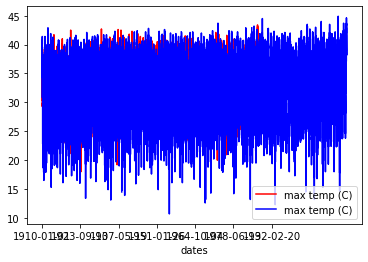

In [9]:
ax = plt.gca()     ### gca stands for 'get current axis'

st1.plot(kind='line',x='dates',y='max temp (C)', color='red', ax=ax)
st2.plot(kind='line',x='dates',y='max temp (C)', color='blue',ax=ax)

plt.show()

Now we will demonstrate how to use `dask.dataframe()` to read in an example station csv file:

In [10]:
filename = '/g/data/yj45/acorn/sat/version_2/site_data/tmax.068151.daily.csv'

dataset = dd.read_csv(filename,names=['dates','max temp (C)','site number','site name'],skiprows=2).compute()
dataset.head()

,dates,max temp (C),site number,site name
0,1946-01-02,21.4,NaN,NaN
1,1946-01-03,28.1,NaN,NaN
2,1946-01-04,37.2,NaN,NaN
3,1946-01-05,30.7,NaN,NaN
4,1946-01-06,27.6,NaN,NaN


Let's extract  the `dates` and `max temp (C)` columns and set the index to `dates`:

In [11]:
dates_and_temperature = dataset[['dates','max temp (C)']]
dates_and_temperature = dates_and_temperature.set_index('dates')

dates_and_temperature.head(2).append(dates_and_temperature.tail(2))

,max temp (C)
dates,
1946-01-02,21.4
1946-01-03,28.1
2019-05-30,14.9
2019-05-31,18.0


We can now easily extract data from the last decade:

In [12]:
data_last_decade = dates_and_temperature.loc['2010':'2020']

data_last_decade.head(2).append(dates_and_temperature.tail(2))

,max temp (C)
dates,
2010-01-01,33.8
2010-01-02,27.9
2019-05-30,14.9
2019-05-31,18.0


Finally, let's plot this timeseries data:

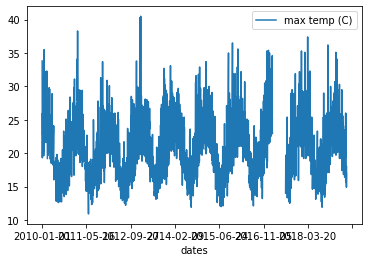

In [13]:
data_last_decade.plot()